In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
final_train_data = pd.read_csv(r"C:\Users\yomol\final_train_data.csv")

In [3]:
final_train_data

,Unnamed: 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,churn
0,0,-0.144117,0.850912,0.746627,1.441546,-0.137847,0
1,1,0.561741,-1.968471,0.497515,0.974107,0.271696,1
2,2,-0.634370,0.133943,-0.291004,-0.638705,0.019668,0
3,3,-0.637598,0.132051,-0.291998,-0.637530,0.020155,0
4,4,-0.636782,0.132529,-0.291747,-0.637827,0.020032,0
...,...,...,...,...,...,...,...
16091,16091,0.576346,-1.853321,-0.007782,0.675284,0.263965,0
16092,16092,-0.645676,-0.134718,1.233958,0.256451,-0.052476,1
16093,16093,-0.643249,-0.039660,0.719385,-0.029007,-0.028282,1
16094,16094,-0.656336,-0.154479,1.243214,0.233612,-0.050689,0


In [4]:
del final_train_data["Unnamed: 0"]

In [5]:
final_train_data

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,churn
0,-0.144117,0.850912,0.746627,1.441546,-0.137847,0
1,0.561741,-1.968471,0.497515,0.974107,0.271696,1
2,-0.634370,0.133943,-0.291004,-0.638705,0.019668,0
3,-0.637598,0.132051,-0.291998,-0.637530,0.020155,0
4,-0.636782,0.132529,-0.291747,-0.637827,0.020032,0
...,...,...,...,...,...,...
16091,0.576346,-1.853321,-0.007782,0.675284,0.263965,0
16092,-0.645676,-0.134718,1.233958,0.256451,-0.052476,1
16093,-0.643249,-0.039660,0.719385,-0.029007,-0.028282,1
16094,-0.656336,-0.154479,1.243214,0.233612,-0.050689,0


##### LOGISTIC REGRESSION MODELLING

Arranging the data to independent and target variables. 

In [9]:
X = final_train_data[["principal component 1","principal component 2","principal component 3","principal component 4","principal component 5"]]
y = final_train_data["churn"]

Splitting the data train and test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\yomol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Prediction

In [13]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


##### Model Evaluation

We need a confussion matrix to evalute the model.

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4318    0]
 [ 511    0]]


Classification report

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4318
           1       0.00      0.00      0.00       511

    accuracy                           0.89      4829
   macro avg       0.45      0.50      0.47      4829
weighted avg       0.80      0.89      0.84      4829



C:\Users\yomol\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ROC Curve

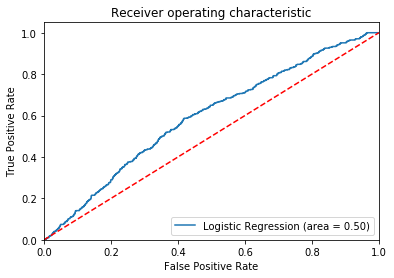

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()